# Importing libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
data=pd.read_csv('C:\\Users\\ANIRUDDHA\\Documents\\data_science\\IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data preprocessing

In [3]:
def dataoverview(data,messege):
    print(f'{messege}:\n')
    print('Rows:',data.shape[0])
    print('\nNumber of Features:',data.shape[1])
    print('\nFeatures:')
    print(data.columns.tolist())
    print('\nMissing values:',data.isnull().sum().values.sum())
    print('\nUnique Values:')
    print(data.nunique())

In [4]:
dataoverview(data,'Overview is:')

Overview is::

Rows: 150

Number of Features: 5

Features:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Missing values: 0

Unique Values:
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking null values

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Checking Duplicate Values

In [8]:
data.duplicated().sum()

3

# Removing duplicates

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

# Ploting data in graph

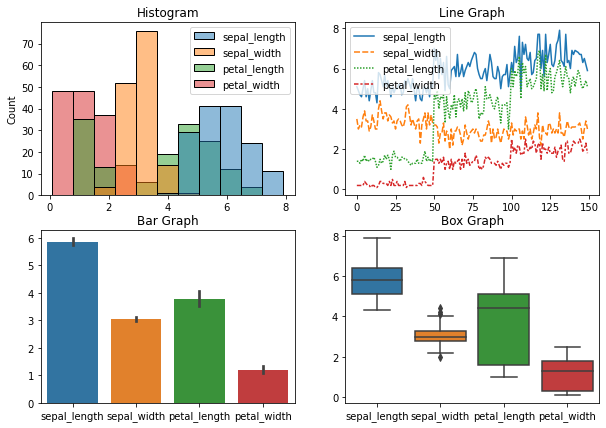

In [11]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.histplot(data=data)
plt.title('Histogram')

plt.subplot(2,2,2)
sns.lineplot(data=data)
plt.title('Line Graph')

plt.subplot(2,2,3)
sns.barplot(data=data)
plt.title('Bar Graph')

plt.subplot(2,2,4)
sns.boxplot(data=data)
plt.title('Box Graph')

plt.show()

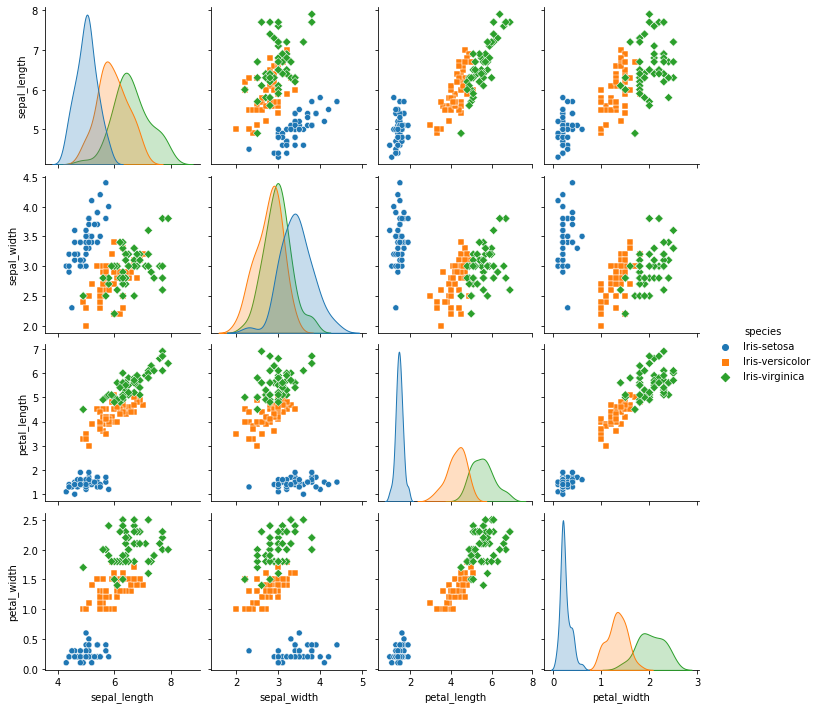

In [12]:
sns.pairplot(data=data,hue='species',markers=['o','s','D'])
plt.show()

# Ploting heatmap

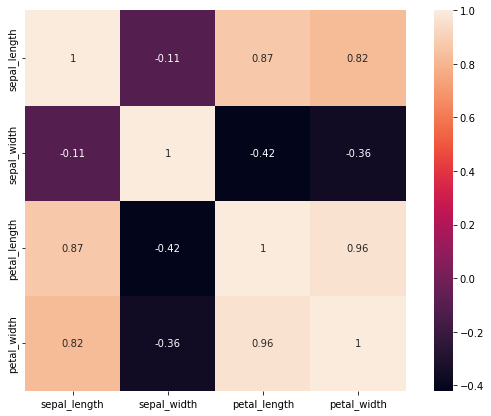

In [13]:
df=data.copy()
df.drop('species',axis=1,inplace=True)
correlation=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True,square=True)
plt.show()

# Drop some columns

In [14]:
df_input=data.drop(columns=['species'],axis=1).values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


# Data split and feature engineering

In [17]:
encoder=LabelEncoder()
y=data['species']
y=encoder.fit_transform(y)

In [18]:
class_mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
for class_label,class_number in class_mapping.items():
    print(f"'{class_label}' is label as {class_number}")

'Iris-setosa' is label as 0
'Iris-versicolor' is label as 1
'Iris-virginica' is label as 2


## Split into training and test sets

In [20]:
x_train,x_test,y_train,y_test=train_test_split(df_input,y,test_size=0.20,random_state=42)

In [21]:
print(x_train)

[[6.4 3.1 5.5 1.8]
 [4.6 3.2 1.4 0.2]
 [5.6 2.8 4.9 2. ]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [7.9 3.8 6.4 2. ]
 [6.2 3.4 5.4 2.3]
 [5.1 3.8 1.9 0.4]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [6.3 2.3 4.4 1.3]
 [6.9 3.1 5.1 2.3]
 [6.6 2.9 4.6 1.3]
 [5.7 3.  4.2 1.2]
 [6.8 3.2 5.9 2.3]
 [6.5 3.2 5.1 2. ]
 [5.1 3.5 1.4 0.2]
 [6.6 3.  4.4 1.4]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [6.  2.2 4.  1. ]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [6.  2.2 5.  1.5]
 [6.7 3.1 4.7 1.5]
 [6.7 3.  5.2 2.3]
 [5.1 3.8 1.6 0.2]
 [5.7 4.4 1.5 0.4]
 [6.3 2.9 5.6 1.8]
 [4.5 2.3 1.3 0.3]
 [5.9 3.2 4.8 1.8]
 [6.5 3.  5.5 1.8]
 [5.  3.3 1.4 0.2]
 [5.7 2.9 4.2 1.3]
 [6.8 3.  5.5 2.1]
 [5.5 4.2 1.4 0.2]
 [5.6 3.  4.1 1.3]
 [6.3 3.3 6.  2.5]
 [5.6 2.9 3.6 1.3]
 [6.4 2.8 5.6 2.1]
 [5.5 2.4 3.8 1.1]
 [5.7 2.8 4.5 1.3]
 [5.4 3.9 1.7 0.4]
 [7.7 2.8 6.7 2. ]
 [5.7 2.8 4.1 1.3]
 [6.4 3.2 4.5 1.5]
 [5.5 3.5 1.3 0.2]
 [5.8 2.7 3.9 1.2]
 [5.7 2.6 3.

In [22]:
print(x_test)

[[6.1 3.  4.9 1.8]
 [5.5 2.3 4.  1.3]
 [6.7 3.1 5.6 2.4]
 [5.1 3.8 1.5 0.3]
 [4.9 2.5 4.5 1.7]
 [4.8 3.  1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [6.  2.7 5.1 1.6]
 [4.9 3.1 1.5 0.1]
 [5.  3.4 1.6 0.4]
 [5.1 2.5 3.  1.1]
 [6.3 2.5 5.  1.9]
 [5.6 2.5 3.9 1.1]
 [6.3 3.4 5.6 2.4]
 [6.2 2.2 4.5 1.5]
 [5.7 3.8 1.7 0.3]
 [6.1 2.8 4.  1.3]
 [6.2 2.8 4.8 1.8]
 [4.8 3.1 1.6 0.2]
 [4.7 3.2 1.6 0.2]
 [7.3 2.9 6.3 1.8]
 [4.4 3.  1.3 0.2]
 [6.9 3.2 5.7 2.3]
 [4.9 2.4 3.3 1. ]
 [4.6 3.6 1.  0.2]
 [5.6 3.  4.5 1.5]
 [7.7 3.  6.1 2.3]
 [5.4 3.  4.5 1.5]
 [4.8 3.4 1.6 0.2]]


In [23]:
print(y_train)

[2 0 2 0 0 2 2 2 0 0 0 2 1 2 1 1 2 2 0 1 1 0 0 1 0 0 0 2 1 2 0 0 2 0 1 2 0
 1 2 0 1 2 1 2 1 1 0 2 1 1 0 1 1 0 2 0 0 1 1 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2
 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 1 1 2 0 1 1 0 2 0 2 0 1 2 2 2 2 1 1 2 2
 0 1 2 0 1 2]


In [24]:
print(y_test)

[2 1 2 0 2 0 1 0 1 0 0 1 2 1 2 1 0 1 2 0 0 2 0 2 1 0 1 2 1 0]


## Apply scaling

In [26]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

# Model Building

## List of models

In [30]:
models={
    'Logical Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [33]:
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    report=classification_report(y_test,y_pred)
    print(f"{model_name}- Accuracy:{accuracy:.2f}")
    print(f"classification report:\n{report}\n")

Logical Regression- Accuracy:0.93
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30


Decision Tree- Accuracy:0.97
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Random Forest- Accuracy:0.93
classification report:
              precision    recall  f1-score   support

           0       1

# here Support vector machine and Decision Tree gives heightest accuracy(0.97 or 97%)